In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(19158, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

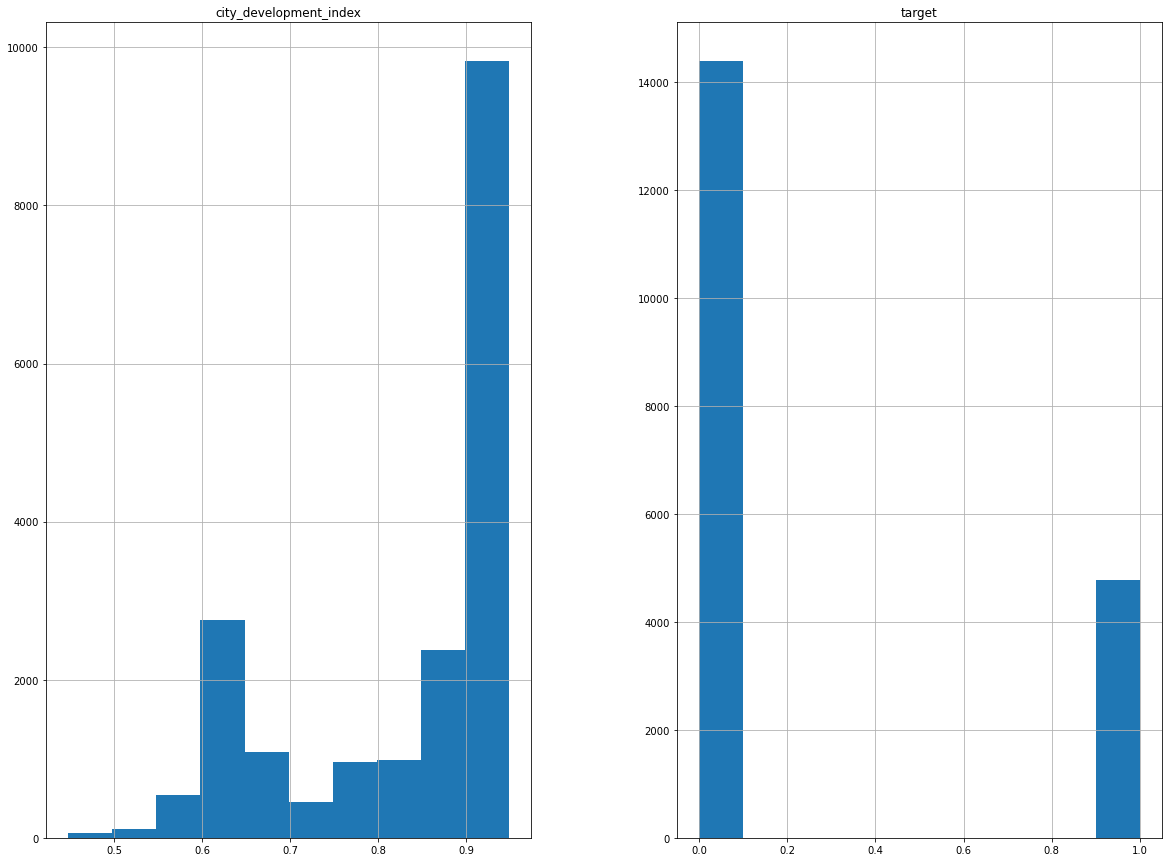

In [9]:
fraqgraph=df.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [11]:
num_null = {}
percent_null = {}
nul_list = []
num = df.shape[0]
for col in df.columns.tolist():
    col_null = df[col].isnull().sum()
    if col_null > 0:
        num_null[col] = col_null
        percent_null[col] = round(col_null/num,2)
        nul_list.append(col)
num_ = pd.Series(num_null)
per_ = pd.Series(percent_null)
con = pd.concat([num_,per_],axis=1).rename(columns={0:"null_numm",1:"null_percent"})

cm = sns.light_palette("#348498", as_cmap=True)
print("{} columns have missing values.".format(df.isnull().any().sum()))
print("--------------------------------------")
con.style.background_gradient(cmap=cm,subset=con.columns.tolist())


8 columns have missing values.
--------------------------------------


,null_numm,null_percent
gender,4508,0.240000
enrolled_university,386,0.020000
education_level,460,0.020000
major_discipline,2813,0.150000
experience,65,0.000000
company_size,5938,0.310000
company_type,6140,0.320000
last_new_job,423,0.020000


In [12]:
#Creating a dataframe exclusively for categorical data
cat_col_df = df.drop(['city_development_index','training_hours','target'], axis=1)

In [13]:
for col in cat_col_df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [15]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [16]:
df['target'].value_counts(normalize=True)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler


In [19]:
X = df.drop("target", axis=1)
y = df["target"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=44, shuffle =True)

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [22]:
le = LabelEncoder()
categorical = list(df.select_dtypes(include=['object','string']).columns.values)
for cat in categorical:
    print(cat)
    df[cat].fillna('UNK', inplace=True)
    df[cat] = le.fit_transform(df[cat])
#     print(le.classes_)
#     print(le.transform(le.classes_))

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [23]:
for col in df.columns:
    df[col] = enc.fit_transform(df[col])

In [25]:
df= df.drop(df.loc[df["gender"] == "Other"].index)
df = df.dropna()


In [26]:
def cate_one(df,*strname):
    strname = list(strname)
    dataset = df.copy()
    getdum = pd.get_dummies(dataset[strname])
    dataset = dataset.drop(strname,axis=1)
    dataset = pd.concat([dataset,getdum],axis=1)
    
    return dataset

df= cate_one(df,"gender")


df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender
0,5018,5,85,0,2,0,5,21,4,5,0,35,1,1
1,16986,77,48,1,2,0,5,6,4,5,4,46,0,1
2,6499,64,14,1,0,0,5,15,4,5,5,82,0,1
3,19067,14,52,1,2,0,1,20,4,5,5,51,1,1
4,358,50,45,0,2,2,5,21,4,1,3,7,0,1


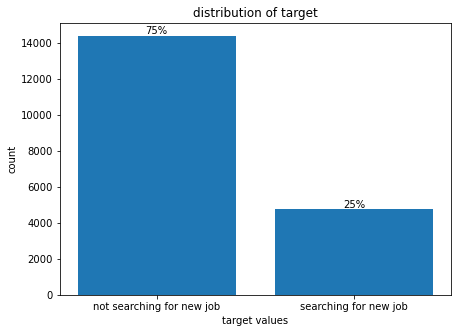

In [28]:
bars = df['target'].value_counts()
plt.figure(figsize=(7,5))
graph = plt.bar(['not searching for new job', 'searching for new job'], bars.values)
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*bars[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

cities' number in dataset is  123


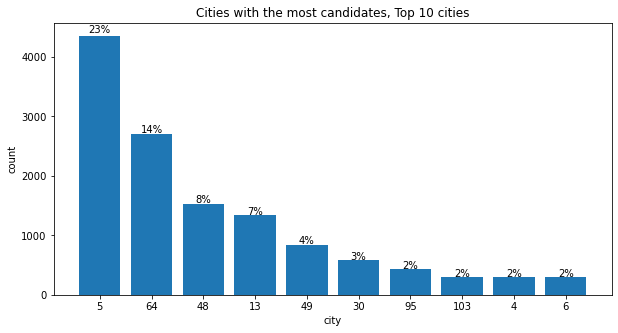

In [29]:
res = df.groupby('city').count().sort_values('enrollee_id', ascending=False).head(10)['enrollee_id']

print("cities' number in dataset is ", len(df.groupby('city').count().reset_index()['city']))

plt.figure(figsize=(10,5))
graph = plt.bar([str(i) for i in res.keys()], res.values)
plt.title('Cities with the most candidates, Top 10 cities')
plt.xlabel('city')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*res.values[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

Out of the 123 cities, we can see that the top 4 cities represent over half of the candidates, with city_103 accounting for almost a quarter.



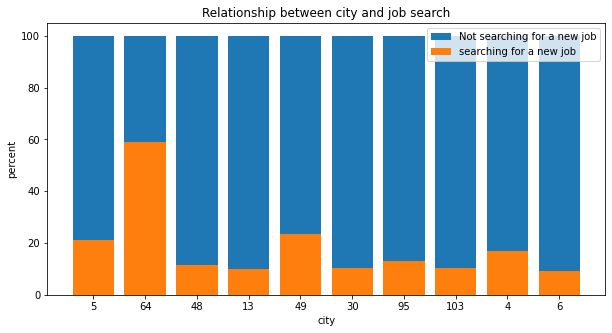

In [30]:
res2 = df.groupby(['city','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']

f_name = [res21[i[0]].values[0] for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i[0]) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i[0]) for i in res21.keys()], [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between city and job search')
plt.xlabel('city')
plt.ylabel('percent')
plt.legend();

In the top 10 cities with the most candidates, the proportion of candidates searching for a new job is lower, with the exception of city_21.

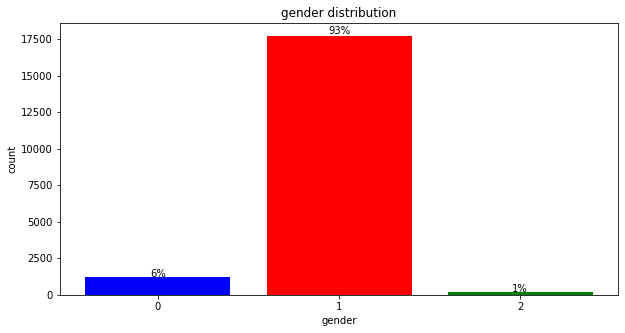

In [31]:
res = df.groupby('gender').count()['enrollee_id']

plt.figure(figsize=(10,5))
graph = plt.bar([str(i) for i in res.keys()], res.values, color=['blue', 'red', 'green'])
plt.title('gender distribution')
plt.xlabel('gender')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*res.values[i]/df['target'].count()))+'%',
             ha='center')
    i += 1

sum of bars percent is less than 100. it means a significant number of participants didn’t share their gender.

In this sample, males make up a majority of participants.

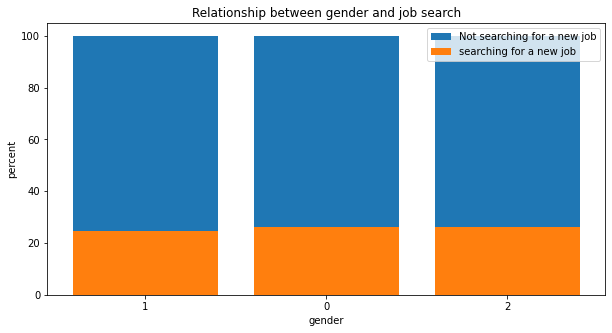

In [32]:
res = df.groupby('gender').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['gender','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [res21[i[0]].values[0] for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i[0]) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i[0]) for i in res21.keys()], [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between gender and job search')
plt.xlabel('gender')
plt.ylabel('percent')
plt.legend();

The percentage of people looking for a new job is almost the same for all genders. The distribution of job seekers in different categories of gender seems to be the same. If the distribution of job seekers is the same in all categories, it indicates that the two variables are independent of each other. Gender has no effect on changing the proportion of job seekers. We use the independence test to prove it.

In order to compute the Chi-square test statistic. we would need to construct a contingency table. We can do that using the ‘crosstab’ function from pandas.



In [36]:
ct = pd.crosstab(df.target, df.gender)
ct

gender,0,1,2
target,,,
0,912,13328,141
1,326,4401,50


In [37]:
from scipy.stats import chi2_contingency

obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 1.5672279776145268 p_val: 0.45675232710915714 df: 2


The value of p_value is less than alpha, ie 0.05. This means that the null hypothesis is rejected and two variables are dependent. That is, knowing the gender of the candidate give us information about whether the person will be looking for a new job. The p_value value is not too far from alpha. That is, the relationship between the two variables was not very strong. The relationship between the two is close to being independent rather than a very strong connection.

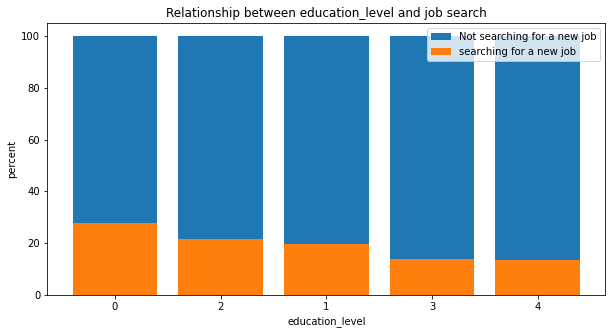

In [38]:
res = df.groupby('education_level').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['education_level','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i[0]) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i[0]) for i in res21.keys()], [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between education_level and job search')
plt.xlabel('education_level')
plt.ylabel('percent')
plt.legend();

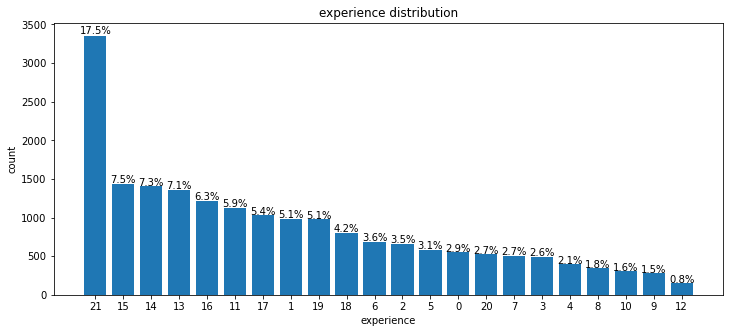

In [39]:
res = df.groupby('experience').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

plt.figure(figsize=(12,5))
graph = plt.bar([str(i) for i in res.keys()], res.values)
plt.title('experience distribution')
plt.xlabel('experience')
plt.ylabel('count')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(round(100*res.values[i]/df['target'].count(),1))+'%',
             ha='center')
    i += 1

In this sample, over 50% of candidates have between 2 and 10 years of work experience.


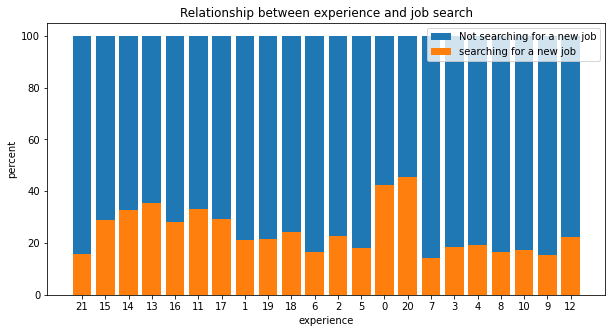

In [40]:
res = df.groupby('experience').count().sort_values('enrollee_id', ascending=False)['enrollee_id']

res2 = df.groupby(['experience','target']).count().loc[res.keys(),:]

res20 = res2.loc[:,0,:]['enrollee_id']
res21 = res2.loc[:,1,:]['enrollee_id']
f_index = [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()]

plt.figure(figsize=(10,5))
plt.bar([str(i[0]) for i in res21.keys()], [100 for i in res21.keys()], label='Not searching for a new job')
plt.bar([str(i[0]) for i in res21.keys()], [100*res21[i[0]].values[0]/(res21[i[0]].values[0]+res20[i[0]].values[0]) for i in res21.keys()], label='searching for a new job')
plt.title('Relationship between experience and job search')
plt.xlabel('experience')
plt.ylabel('percent')
plt.legend();

The less work experience, the more probable the candidate is searching for a new job.


Text(0.5, 1.0, 'Correlation Heatmap')

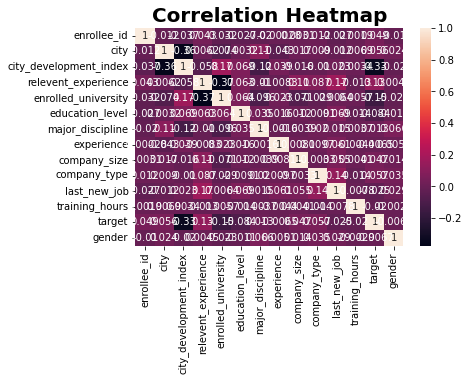

In [41]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', weight='bold',fontsize=20)

As can be seen, there is a correlation between the target and the two variables of developmental criteria and training hours. The abs of the correlation between the target and the development criterion is greater than the abs of the correlation between the target and the training hours. That is, the relationship between the development criterion and the label is stronger. 